<a href="https://colab.research.google.com/github/rkaclfdl123/TIL/blob/master/%EC%9D%B4%EB%AF%B8%EC%A7%80_%EC%A1%B0%ED%95%A9%ED%95%98%EC%97%AC_%EB%AA%A8%EB%8D%B8_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 이미지와 CSV 파일 불러오기

In [2]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import KFold
import tensorflow as tf


path="/content/drive/MyDrive/petfinder-pawpularity-score"
train=pd.read_csv(path+'/train.csv')
test=pd.read_csv(path+'/test.csv')

In [3]:
train["file_path"] = train["Id"].apply(lambda x:path +"/train/"+ x + ".jpg")
test["file_path"] = test["Id"].apply(lambda x:path +"/test/"+ x + ".jpg")

In [30]:
train["file_path"]

0       /content/drive/MyDrive/petfinder-pawpularity-s...
1       /content/drive/MyDrive/petfinder-pawpularity-s...
2       /content/drive/MyDrive/petfinder-pawpularity-s...
3       /content/drive/MyDrive/petfinder-pawpularity-s...
4       /content/drive/MyDrive/petfinder-pawpularity-s...
                              ...                        
9907    /content/drive/MyDrive/petfinder-pawpularity-s...
9908    /content/drive/MyDrive/petfinder-pawpularity-s...
9909    /content/drive/MyDrive/petfinder-pawpularity-s...
9910    /content/drive/MyDrive/petfinder-pawpularity-s...
9911    /content/drive/MyDrive/petfinder-pawpularity-s...
Name: file_path, Length: 9912, dtype: object

In [87]:


train_image=["/content/Untitled Folder 2/train 원본.jpg",
             "/content/Untitled Folder 2/train 흑백.jpg",
             "/content/Untitled Folder 2/train cropped.jpg",
             "/content/Untitled Folder 2/train고해상도.png",
             "/content/Untitled Folder 2/train cropped 흑백.jpg",
             "/content/Untitled Folder 2/train 흑백 고해상도.png",
             "/content/Untitled Folder 2/train cropped 고해상도.png",
             "/content/Untitled Folder 2/train 흑백 cropped 고해상도.png",
             "/content/Untitled Folder 2/train 철창제거",
             "/content/Untitled Folder 2/train 철창제거 흑백.jpg",
             "/content/Untitled Folder 2/train 철창 제거 cropped.png",
             "/content/Untitled Folder 2/train 철창 제거 고해상도.png",
             "/content/Untitled Folder 2/train 철창 제거 흑백 cropped.jpg",
             "/content/Untitled Folder 2/train 철창 제거 흑백 고해상도.png",
             "/content/Untitled Folder 2/train 흑백 cropped 고해상도.png",
             "/content/Untitled Folder 2/train 철창 제거 cropped 고해상도 흑백.jpg",

             "/content/Untitled Folder 2/고해상도 cropped 배경제거.png",
             "/content/Untitled Folder 2/철창제거 cropped 흑백 고해상도 배경제거.png",
             "/content/Untitled Folder 2/cropped 배경제거.png",
             "/content/Untitled Folder 2/흑백 cropped 배경제거.png",
             "/content/Untitled Folder 2/고해상도 배경제거.png",
             "/content/Untitled Folder 2/고해상도 흑백 배경제거.png",
             "/content/Untitled Folder 2/배경제거.png",
             "/content/Untitled Folder 2/고해상도 철창제거cropped 배경제거.png",
             "/content/Untitled Folder 2/철창제거 cropped 흑백 고해상도 배경제거.png",
             "/content/Untitled Folder 2/철창제거 고해상도 배경제거.png",
             "/content/Untitled Folder 2/철창제거 고해상도 흑백 배경제거.png",
             "/content/Untitled Folder 2/철창제거 흑백 배경제거.png",
             "/content/Untitled Folder 2/철창제거 cropped 배경제거.png",
             "/content/Untitled Folder 2/철창제거 cropped 흑백 배경제거.png",
             "/content/Untitled Folder 2/철창제거 배경제거.png",
             "/content/Untitled Folder 2/흑백 배경제거.png",

             "/content/drive/MyDrive/Project II/배경제거_train/밝기조정/고해상도 cropped 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_train/밝기조정/고해상도 흑백 cropped 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_train/밝기조정/cropped 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_train/밝기조정/흑백 cropped 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_train/밝기조정/고해상도 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_train/밝기조정/고해상도 흑백 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_train/밝기조정/배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_train/밝기조정/고해상도 철창제거cropped 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_train/밝기조정/철창제거 cropped 흑백 고해상도 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_train/밝기조정/철창제거 고해상도 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_train/밝기조정/철창제거 고해상도 흑백 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_train/밝기조정/철창제거 흑백 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_train/밝기조정/철창제거 cropped 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_train/밝기조정/철창제거 cropped 흑백 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_train/밝기조정/철창제거 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_train/밝기조정/흑백 배경제거_밝기.png"]
     

In [63]:
#순서
# 1.원본
# 2.흑백
# 3.cropped
# 4.고해상도
# 5.cropped + 흑백
# 6.고해상도 + 흑백
# 7.고해상도 +cropped
# 8.흑백 + cropped + 고해상도
# 9. 철창
# 10. 철창 + 흑백
# 11 철창 + cropped
# 12 철창 + 고해상도
# 13 철창 + 흑백 + cropped
# 14 철창 + 흑백 고해상도
# 15 철창 + cropped 고해상도
# 16 철창 + 흑백 cropped 고해상도
# 17.cropped 고해상도 배경제거.png
# 18cropped 고해상도 흑백 배경제거.png",
# 19cropped 배경제거.png",
# 20cropped 흑백 배경제거.png",
# 21고해상도 배경제거.png",
# 22고해상도 흑백 배경제거.png",
# 23원본 배경제거.png",
# 24철창 cropped 고해상도 배경제거.png",
# 25철창 cropped 고해상도 흑백 배경제거.png",
# 26철창 제거 고해상도 배경제거.png",
# 27철창 제거 고해상도 흑백 배경제거.png",
# 28철창제거 + 흑백 배경제거.png",
# 29철창제거 cropped 배경제거.png",
# 30철창제거 cropped 흑백 배경제거.png",
# 31철창제거 배경제거.png",
# 32흑백 배경제거.png"]
# 33cropped 고해상도 배경제거_밝기.png",
# 34"cropped 고해상도 흑백 배경제거_밝기.png",
# 35 cropped 배경제거_밝기.png",
# 36" cropped 흑백 배경제거_밝기.png",
# 37 " 고해상도 배경제거_밝기.png",
# 38" 고해상도 흑백 배경제거_밝기.png",
# 39" 원본 배경제거_밝기.png",
# 40" 철창 cropped 고해상도 배경제거_밝기.png",
# 41" 철창 cropped 고해상도 흑백 배경제거_밝기.png",
# 42" 철창 제거 고해상도 배경제거_밝기.png",
# 43"/철창 제거 고해상도 흑백 배경제거_밝기.png",
# 44" 철창제거 + 흑백 배경제거_밝기.png",
# 45" 철창제거 cropped 배경제거_밝기.png",
# 46" 철창제거 cropped 흑백 배경제거_밝기.png",
# 47" 철창제거 배경제거_밝기.png",
# 48" 흑백 배경제거_밝기.png"







insta_image=["/content/Untitled Folder 1/유기견4007 원본.jpg",
             "/content/Untitled Folder 1/유기견4007 흑백.jpg",
             "/content/Untitled Folder 1/유기견4007 cropped.jpg",
             "/content/Untitled Folder 1/유기견4007 고해상도.png",
             "/content/Untitled Folder 1/유기견4007 cropped 흑백.jpg",
             "/content/Untitled Folder 1/유기견4007 고해상도 흑백.jpg",
             "/content/Untitled Folder 1/유기견4007 cropped 고해상도.png",
             "/content/Untitled Folder 1/유기견4007 cropped 고해상도 흑백.jpg",
             "/content/Untitled Folder 1/유기견4007 철창제거.jpg",
             "/content/Untitled Folder 1/유기견4007 철창제거 + 흑백.jpg",
             "/content/Untitled Folder 1/유기견4007 철창제거 cropped.jpg",
             "/content/Untitled Folder 1/유기견4007 철창 제거 고해상도.png",
             "/content/Untitled Folder 1/유기견4007 철창제거 cropped 흑백.jpg",
             "/content/Untitled Folder 1/유기견4007 철창 제거 고해상도 흑백.jpg",
             "/content/Untitled Folder 1/유기견4007 철창 cropped 고해상도.png",
             "/content/Untitled Folder 1/유기견4007 철창 cropped 고해상도 흑백.jpg",
             "/content/drive/MyDrive/Project II/배경제거_인스타/유기견4007 cropped 고해상도 배경제거.png",
             "/content/drive/MyDrive/Project II/배경제거_인스타/유기견4007 cropped 고해상도 흑백 배경제거.png",
             "/content/drive/MyDrive/Project II/배경제거_인스타/유기견4007 cropped 배경제거.png",
             "/content/drive/MyDrive/Project II/배경제거_인스타/유기견4007 cropped 흑백 배경제거.png",
             "/content/drive/MyDrive/Project II/배경제거_인스타/유기견4007 고해상도 배경제거.png",
             "/content/drive/MyDrive/Project II/배경제거_인스타/유기견4007 고해상도 흑백 배경제거.png",
             "/content/drive/MyDrive/Project II/배경제거_인스타/유기견4007 원본 배경제거.png",
             "/content/drive/MyDrive/Project II/배경제거_인스타/유기견4007 철창 cropped 고해상도 배경제거.png",
             "/content/drive/MyDrive/Project II/배경제거_인스타/유기견4007 철창 cropped 고해상도 흑백 배경제거.png",
             "/content/drive/MyDrive/Project II/배경제거_인스타/유기견4007 철창 제거 고해상도 배경제거.png",
             "/content/drive/MyDrive/Project II/배경제거_인스타/유기견4007 철창 제거 고해상도 흑백 배경제거.png",
             "/content/drive/MyDrive/Project II/배경제거_인스타/유기견4007 철창제거 + 흑백 배경제거.png",
             "/content/drive/MyDrive/Project II/배경제거_인스타/유기견4007 철창제거 cropped 배경제거.png",
             "/content/drive/MyDrive/Project II/배경제거_인스타/유기견4007 철창제거 cropped 흑백 배경제거.png",
             "/content/drive/MyDrive/Project II/배경제거_인스타/유기견4007 철창제거 배경제거.png",
             "/content/drive/MyDrive/Project II/배경제거_인스타/유기견4007 흑백 배경제거.png",

             "/content/drive/MyDrive/Project II/배경제거_인스타/밝기조정/유기견4007 cropped 고해상도 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_인스타/밝기조정/유기견4007 cropped 고해상도 흑백 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_인스타/밝기조정/유기견4007 cropped 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_인스타/밝기조정/유기견4007 cropped 흑백 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_인스타/밝기조정/유기견4007 고해상도 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_인스타/밝기조정/유기견4007 고해상도 흑백 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_인스타/밝기조정/유기견4007 원본 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_인스타/밝기조정/유기견4007 철창 cropped 고해상도 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_인스타/밝기조정/유기견4007 철창 cropped 고해상도 흑백 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_인스타/밝기조정/유기견4007 철창 제거 고해상도 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_인스타/밝기조정/유기견4007 철창 제거 고해상도 흑백 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_인스타/밝기조정/유기견4007 철창제거 + 흑백 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_인스타/밝기조정/유기견4007 철창제거 cropped 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_인스타/밝기조정/유기견4007 철창제거 cropped 흑백 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_인스타/밝기조정/유기견4007 철창제거 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_인스타/밝기조정/유기견4007 흑백 배경제거_밝기.png"]


In [77]:



shelter_image=["/content/Untitled Folder/유기견9165 원본.jpg",
             "/content/Untitled Folder/유기견9165 흑백.jpg",
             "/content/Untitled Folder/유기견9165 cropped.jpg",
             "/content/Untitled Folder/유기견9165 고해상도.png",
             "/content/Untitled Folder/유기견9165 cropped 흑백.jpg",
             "/content/Untitled Folder/유기견9165 고해상도 흑백.jpg",
             "/content/Untitled Folder/유기견9165 cropped 고해상도.png",
             "/content/Untitled Folder/유기견9165 cropped 고해상도 흑백.jpg",
             "/content/Untitled Folder/유기견9165 원본(동물보호)_철창제거.jpg",
             "/content/Untitled Folder/유기견9165 철창제거 흑백.jpg",
             "/content/Untitled Folder/유기견9165 철창제거 cropped.jpg",
             "/content/Untitled Folder/유기견9165 철창제거 고해상도.png",
             "/content/Untitled Folder/유기견9165 철창제거 cropped 흑백.jpg",
             "/content/Untitled Folder/유기견9165 철창제거 고해상도 흑백.jpg",
             "/content/Untitled Folder/유기견9165 철창 cropped 고해상도.png",
             "/content/Untitled Folder/유기견9165 철창 cropped 흑백 고해상도.png",
             
             "/content/drive/MyDrive/Project II/배경제거_동물보호/유기견9165 cropped 고해상도 배경제거.png",
             "/content/drive/MyDrive/Project II/배경제거_동물보호/유기견9165 cropped 고해상도 흑백 배경제거.png",
             "/content/drive/MyDrive/Project II/배경제거_동물보호/유기견9165 cropped 배경제거.png",
             "/content/drive/MyDrive/Project II/배경제거_동물보호/유기견9165 cropped 흑백 배경제거.png",
             "/content/drive/MyDrive/Project II/배경제거_동물보호/유기견9165 고해상도 배경제거.png",
             "/content/drive/MyDrive/Project II/배경제거_동물보호/유기견9165 고해상도 흑백 배경제거.png",
             "/content/drive/MyDrive/Project II/배경제거_동물보호/유기견9165 원본 배경제거.png",
             "/content/drive/MyDrive/Project II/배경제거_동물보호/유기견9165 철창 cropped 고해상도 배경제거.png",
             "/content/drive/MyDrive/Project II/배경제거_동물보호/유기견9165 철창 cropped 흑백 고해상도 배경제거.png",
             "/content/drive/MyDrive/Project II/배경제거_동물보호/유기견9165 철창제거 고해상도 배경제거.png",
             "/content/drive/MyDrive/Project II/배경제거_동물보호/유기견9165 철창제거 고해상도 흑백 배경제거.png",
             "/content/drive/MyDrive/Project II/배경제거_동물보호/유기견9165 철창제거 흑백 배경제거.png",
             "/content/drive/MyDrive/Project II/배경제거_동물보호/유기견9165 철창제거 cropped 배경제거.png",
             "/content/drive/MyDrive/Project II/배경제거_동물보호/유기견9165 철창제거 cropped 흑백 배경제거.png",
             "/content/drive/MyDrive/Project II/배경제거_동물보호/유기견9165 원본(동물보호)_철창제거 배경제거.png",
             "/content/drive/MyDrive/Project II/배경제거_동물보호/유기견9165 흑백 배경제거.png",

             "/content/drive/MyDrive/Project II/배경제거_동물보호/밝기조정/유기견9165 cropped 고해상도 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_동물보호/밝기조정/유기견9165 cropped 고해상도 흑백 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_동물보호/밝기조정/유기견9165 cropped 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_동물보호/밝기조정/유기견9165 cropped 흑백 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_동물보호/밝기조정/유기견9165 고해상도 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_동물보호/밝기조정/유기견9165 고해상도 흑백 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_동물보호/밝기조정/유기견9165 원본 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_동물보호/밝기조정/유기견9165 철창 cropped 고해상도 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_동물보호/밝기조정/유기견9165 철창 cropped 흑백 고해상도 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_동물보호/밝기조정/유기견9165 철창제거 고해상도 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_동물보호/밝기조정/유기견9165 철창제거 고해상도 흑백 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_동물보호/밝기조정/유기견9165 철창제거 흑백 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_동물보호/밝기조정/유기견9165 철창제거 cropped 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_동물보호/밝기조정/유기견9165 철창제거 cropped 흑백 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_동물보호/밝기조정/유기견9165 원본(동물보호)_철창제거 배경제거_밝기.png",
             "/content/drive/MyDrive/Project II/배경제거_동물보호/밝기조정/유기견9165 흑백 배경제거_밝기.png"]
#배경제거_동물보호/밝기조정/유기견9165 철창제거 배경제거_밝기.png;

# 이미지 전처리
- 이미지 크기 128 x 128로 변환
- JPEG로 인코딩 된 이미지를 uint8 텐서로 디코딩
- 255로 나누어 픽셀값 정규화 



In [5]:
image_size = 128
def preprocess(image_url):
    image_string = tf.io.read_file(image_url)
    image = tf.image.decode_jpeg(image_string, channels=3)
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.image.resize(image, (image_size, image_size))
    return image
    

image.png


## 이미지 전처리(train, test) 

In [6]:
x_train=[]
for i in train['file_path']:
    x1=preprocess(i)
    x_train.append(x1)

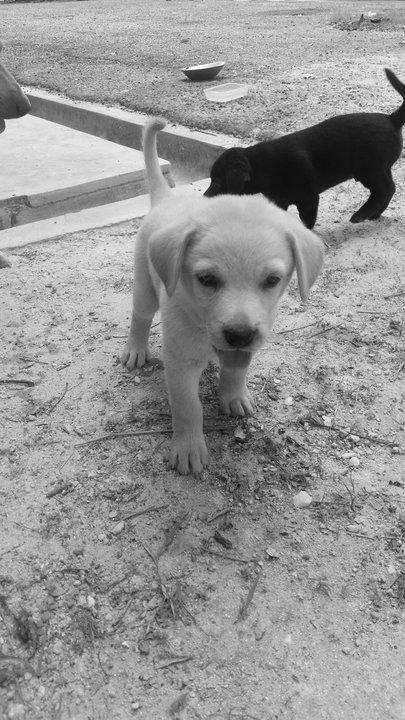

In [29]:
from PIL import Image 
im=Image.open(train['file_path'][0]).convert("L")
im

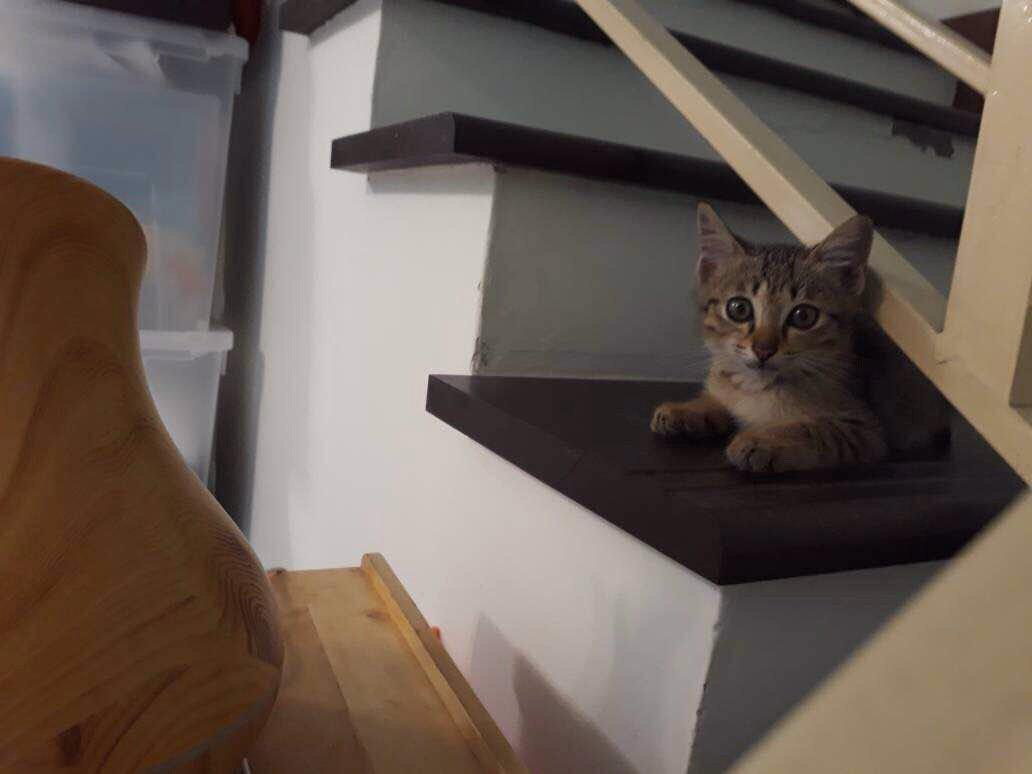

In [19]:
im=Image.open(train['file_path'][1]).convert("RGB")
im

In [7]:
test2=[]
for i in test['file_path']:
    x1=preprocess(i)
    test2.append(x1)
test2=np.array(test2)

In [88]:
train_test=[]
for i in train_image:
    x1=preprocess(i)
    train_test.append(x1)
train_test=np.array(train_test)

In [64]:
insta_test=[]
for i in insta_image:
    x1=preprocess(i)
    insta_test.append(x1)
insta_test=np.array(insta_test)

In [78]:
shelter_test=[]
for i in shelter_image:
    x1=preprocess(i)
    shelter_test.append(x1)
shelter_test=np.array(shelter_test)

#모델 학습


In [8]:
x_train=np.array(x_train)
y_train=train['Pawpularity']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2)

In [9]:
inputs=keras.Input(shape=(128,128,3))
x=inputs
x=keras.layers.Conv2D(filters=4,kernel_size=3,strides=2,padding='same',activation='relu')(x)
x=keras.layers.Conv2D(filters=8,kernel_size=3,strides=2,padding='same',activation='relu')(x)
x=keras.layers.Conv2D(filters=16,kernel_size=3,strides=2,padding='same',activation='relu')(x)
x=keras.layers.Conv2D(filters=32,kernel_size=3,strides=2,padding='same',activation='relu')(x)
x=keras.layers.Flatten()(x)
x=keras.layers.Dense(128, activation = "relu")(x)
x=keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(1)(x)
model = tf.keras.Model(inputs=inputs, outputs=output)

In [10]:
early_stop = tf.keras.callbacks.EarlyStopping(
    patience=5
    )
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    factor=0.1,
    patience=2, 
    min_lr=1e-9
    )
callbacks = [early_stop,reduce_lr]

In [11]:
model.compile(loss='mse', optimizer='Adam', metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse"), "mae", "mape"])

In [12]:
history = model.fit(x_train,y_train, epochs=25,batch_size=32,validation_data = (x_test,y_test),callbacks=callbacks)

Epoch 1/25
248/248 [==============================] - 12s 44ms/step - loss: 533.3268 - rmse: 23.0939 - mae: 17.1277 - mape: 77.1165 - val_loss: 464.2510 - val_rmse: 21.5465 - val_mae: 15.5138 - val_mape: 76.3739
Epoch 2/25
248/248 [==============================] - 11s 43ms/step - loss: 451.9100 - rmse: 21.2582 - mae: 15.8699 - mape: 77.7235 - val_loss: 461.3174 - val_rmse: 21.4783 - val_mae: 15.4045 - val_mape: 75.9992
Epoch 3/25
248/248 [==============================] - 11s 43ms/step - loss: 450.6968 - rmse: 21.2296 - mae: 15.8127 - mape: 76.6251 - val_loss: 452.9143 - val_rmse: 21.2818 - val_mae: 15.8928 - val_mape: 82.9442
Epoch 4/25
248/248 [==============================] - 11s 43ms/step - loss: 448.9983 - rmse: 21.1896 - mae: 15.8219 - mape: 77.3616 - val_loss: 452.4394 - val_rmse: 21.2706 - val_mae: 16.0848 - val_mape: 85.4477
Epoch 5/25
248/248 [==============================] - 11s 43ms/step - loss: 445.1835 - rmse: 21.0994 - mae: 15.8659 - mape: 77.9004 - val_loss: 452.2266

In [32]:
cnn_pred=model.predict(test2)
cnn_pred

array([[30.867392],
       [30.032675],
       [29.585104],
       [31.025463],
       [30.014849],
       [30.908768],
       [30.663599],
       [29.726065]], dtype=float32)

In [ ]:
#순서
# 1.원본
# 2.흑백
# 3.cropped
# 4.고해상도
# 5.cropped + 흑백
# 6.고해상도 + 흑백
# 7.고해상도 +cropped
# 8.흑백 + cropped + 고해상도
# 9. 철창
# 10. 철창 + 흑백
# 11 철창 + cropped
# 12 철창 + 고해상도
# 13 철창 + 흑백 + cropped
# 14 철창 + 흑백 고해상도
# 15 철창 + cropped 고해상도
# 16 철창 + 흑백 cropped 고해상도

In [89]:
cnn_pred=model.predict(train_test)
cnn_pred

array([[35.320072],
       [35.511116],
       [36.70493 ],
       [35.2602  ],
       [37.02555 ],
       [35.420944],
       [36.66709 ],
       [36.840946],
       [36.17135 ],
       [36.33933 ],
       [37.437366],
       [36.231525],
       [37.316154],
       [36.338154],
       [36.840946],
       [37.277428],
       [37.095215],
       [37.336388],
       [37.458504],
       [37.626766],
       [37.69321 ],
       [37.73482 ],
       [37.733643],
       [37.35495 ],
       [37.336388],
       [37.675392],
       [37.813267],
       [37.779495],
       [37.429092],
       [37.46624 ],
       [37.651787],
       [37.70125 ],
       [37.550064],
       [38.088737],
       [37.963337],
       [38.196514],
       [38.282616],
       [38.25823 ],
       [38.26101 ],
       [37.8661  ],
       [37.89715 ],
       [38.285217],
       [38.331734],
       [38.29976 ],
       [37.875584],
       [38.010086],
       [38.268784],
       [38.252365]], dtype=float32)

In [86]:
cnn_pred=model.predict(insta_test)
len(cnn_pred)

48

In [79]:
cnn_pred=model.predict(shelter_test)
cnn_pred

array([[36.53851 ],
       [36.247555],
       [37.729095],
       [35.249847],
       [37.436256],
       [35.07679 ],
       [37.121746],
       [36.845734],
       [38.16646 ],
       [38.06878 ],
       [39.07785 ],
       [37.856884],
       [38.930035],
       [37.73336 ],
       [38.83788 ],
       [38.741714],
       [37.927017],
       [38.21965 ],
       [38.38339 ],
       [38.449623],
       [38.444656],
       [38.626465],
       [39.027733],
       [38.836906],
       [38.69319 ],
       [38.934113],
       [38.828278],
       [39.130676],
       [39.202847],
       [39.036236],
       [39.055267],
       [38.976906],
       [38.189323],
       [38.62713 ],
       [38.700104],
       [38.90278 ],
       [38.737694],
       [38.784172],
       [39.179653],
       [39.06719 ],
       [39.14556 ],
       [39.173717],
       [39.20855 ],
       [39.46206 ],
       [39.31955 ],
       [39.423046],
       [39.354668],
       [39.156822]], dtype=float32)